In [3]:
# THE SCRIPT CONTAINS THE DECISION TREE

In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [5]:
# Define path for where data is stored
path = r'C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Data Sets'

In [6]:
# Read in the Answers data.
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))


In [7]:
# Read the unscaled data (which I want to use in this exercise).
data_unscaled = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [8]:
data_unscaled.head(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9


In [9]:
# Drop Gdansk, Roma and Tours since they are missing from the Answers file. I use a filtering function. 

# List of city names
cities = ['GDANSK', 'ROMA', 'TOURS']

# Find columns that include any of the city names
cols_to_drop = [col for col in data_unscaled.columns if any(city in col for city in cities)]

# Drop those columns
dataun_clean = data_unscaled.drop(columns=cols_to_drop)

# Count nr of columns in dataun_clean
num_columns = dataun_clean.shape[1]
print(num_columns)

149


In [10]:
## Create a subset by dropping date and month
x = dataun_clean.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [11]:
print(x.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [12]:
# Count nr of columns
num_columns = dataun_clean.shape[1]
print(num_columns)

# Count nr of columns
num_columns = answers.shape[1]
print(num_columns)

149
16


In [13]:
## Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [14]:
#viewing shape of training and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


[Text(0.3682613433846082, 0.9807692307692307, 'x[49] <= 17.95\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06331312322879458, 0.9423076923076923, 'x[98] <= 17.95\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.21578723330670138, 0.9615384615384615, 'True  '),
 Text(0.01782045590634098, 0.9038461538461539, 'x[19] <= 17.95\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.0

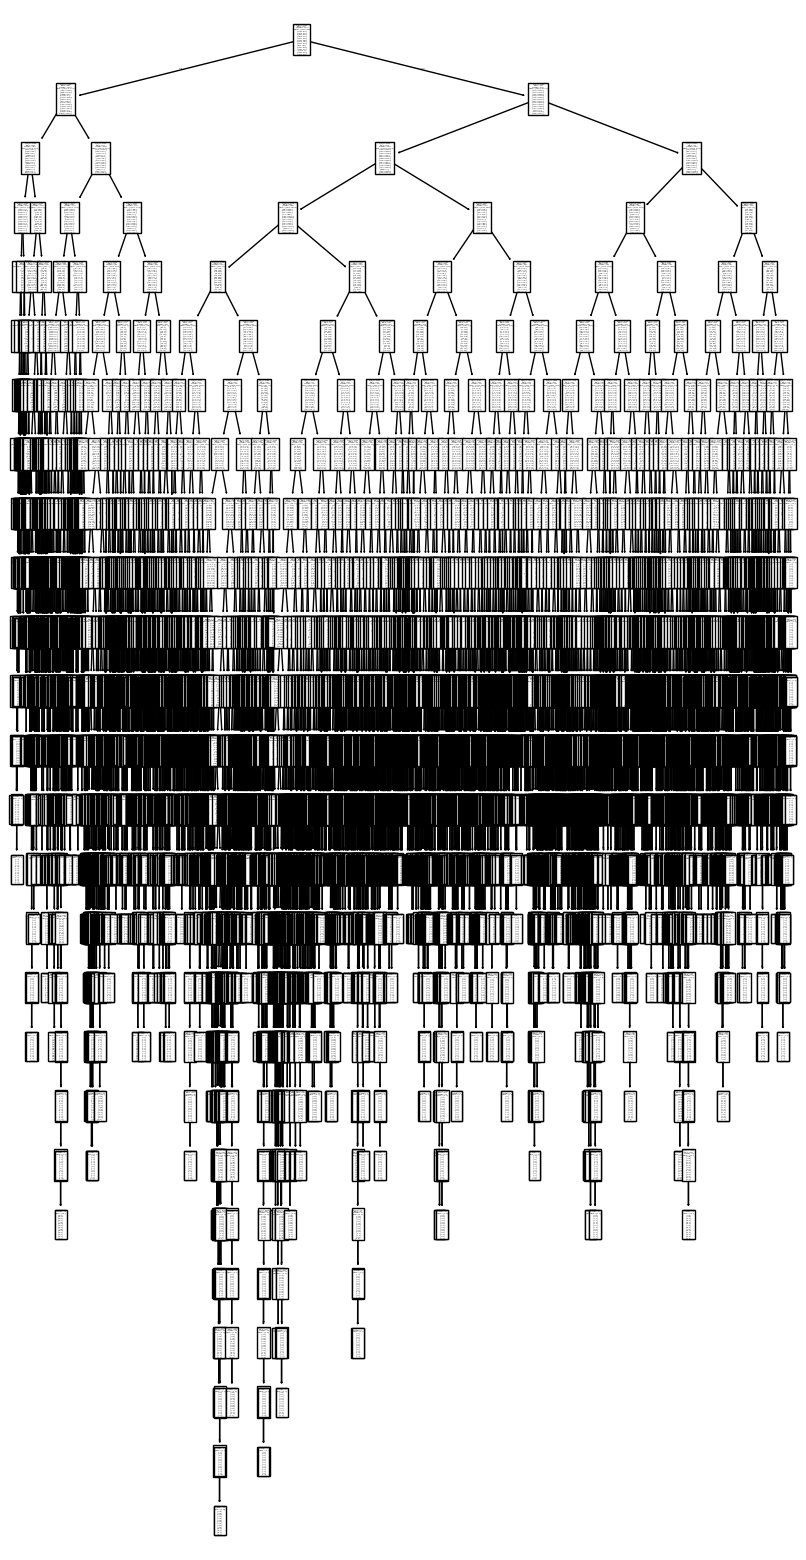

In [15]:
## DECISION TREES
#Run Decision Tree classifier
activedt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
activedt.fit(x_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(activedt)

In [16]:
# Determine the training accuracy score using the cross validation method
y_pred_train = activedt.predict(x_train)
print('Train accuracy score: ',cross_val_score(activedt, x_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6018475421591066


In [17]:
key = "_pleasant_weather"
locations = [col.replace(key, "") for col in y_test.columns if key in col]
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [21]:
#What is the testing accuracy score? Using the cross validation method. Needed to understand if ok to use the decision tree or not. 
y_pred = activedt.predict(x_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.6303590101080516


array([[[4138,  200],
        [ 161, 1239]],

       [[3643,  133],
        [ 110, 1852]],

       [[3742,  158],
        [ 138, 1700]],

       [[4381,  256],
        [ 196,  905]],

       [[4475,   32],
        [  48, 1183]],

       [[4257,  313],
        [ 238,  930]],

       [[4645,  170],
        [ 134,  789]],

       [[4133,   62],
        [  46, 1497]],

       [[4325,  237],
        [ 181,  995]],

       [[2995,  173],
        [ 140, 2430]],

       [[4366,  180],
        [ 158, 1034]],

       [[4732,  147],
        [ 151,  708]],

       [[5738,    0],
        [   0,    0]],

       [[4520,  246],
        [ 271,  701]],

       [[5294,  168],
        [ 181,   95]]], dtype=int64)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


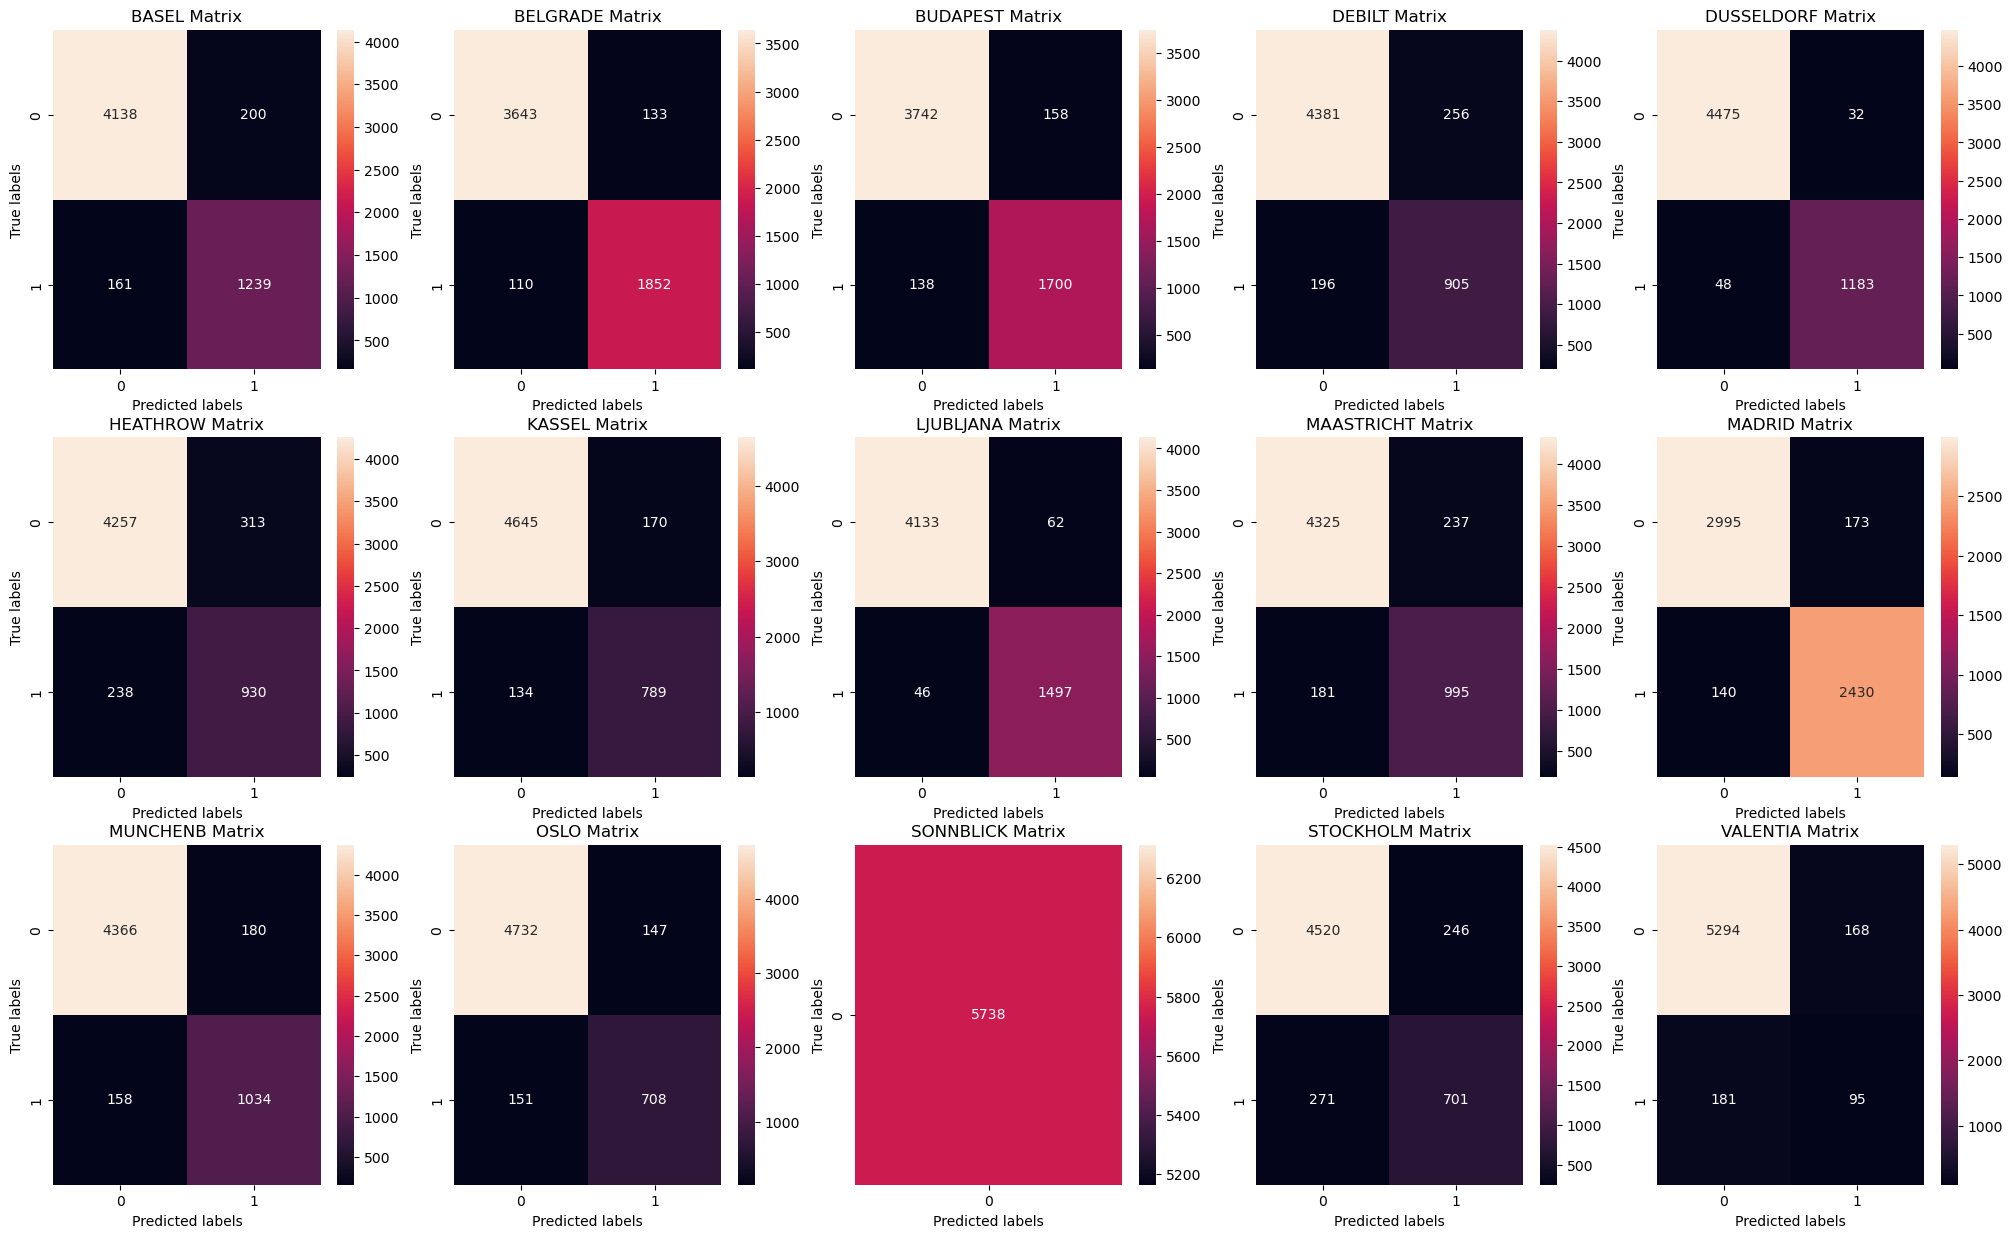

In [22]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1